Python Imlementation of:

***SCHILLINGER INSTRUMENT DESTRIBUTION***

for more information: Joseph Schillinger (1946): Schillinger System of Musical Composition.(New York: C. Fischer, Inc.)

Konstantin Svechtarov 2017©

In [1]:
# imports modules
%load_ext autoreload
%autoreload 2
import schillinger.rhythm as SR
import schillinger.pitch as SP
import itertools
import random
from music21 import *
%load_ext music21.ipython21

In [2]:
#convert2d to 1d 
def convert2Dto1D(data):
    flat_array = []
    for d in data:
        if isinstance(d[0], list) or isinstance(d[0], tuple):
            for l in d:
                
                flat_array.append(l)
        else:
            flat_array.append(d)
    return flat_array

In [3]:
# NOTES FOR RHYTM

def showSplittedNotes_RHYTHM(length, data, time_meter, note_sequece, duration_divider):
    attacks = convert2Dto1D(data)
    #TS = str(int(len(clock))) +'/'+ str(int((clock[0].duration.quarterLength*16)))
    TS = str(time_meter[0])+'/'+str(time_meter[1])
    
    s = stream.Score(id='mainScore')
    
    for seq, sequences in enumerate(attacks):
        p0 = stream.Part(id='part0')
        p0.timeSignature = meter.TimeSignature(TS)
        tones = []
        note_counter = 0
        for i in range(len(sequences)):
            nota = pitch.Pitch(note_sequece[note_counter%len(note_sequece)])
            note_counter += 1
            nota.octave = 4-seq
            nota = note.Note(nota.nameWithOctave)
            nota.duration.quarterLength = sequences[i%len(sequences)]*duration_divider
            tones.append(nota)
            
        p0.append(tones)
        s.insert(0, p0)
    return s


In [4]:
#notes from harmony_Tests
#note_s=['C', 'E-', 'G', 'B-', 'D', 'E', 'G', 'B-', 'D', 'F', 'B-', 'D', 'F', 'A', 'C', 'A', 'C', 'E', 'G', 'B-', 'E', 'G', 'B-', 'D', 'F', 'A-', 'C-', 'E-', 'G-', 'B-', 'A-', 'C', 'E-', 'G', 'B-', 'C', 'E', 'G', 'B-', 'D', 'G', 'B-', 'D', 'F', 'A', 'F', 'A', 'C', 'E', 'G', 'F', 'A', 'C', 'E', 'G', 'F-', 'A-', 'C-', 'E-', 'G-', 'F', 'A-', 'C', 'E-', 'G']
# get note sequence from another notebook "HARMONY_TESTS_ON_GIANT_STEPS-Experiments"
%store -r cleaned_filled_harm
note_s = cleaned_filled_harm
#note_s



In [1]:
# SCHILLINGER INSTRUMENT DESTRIBUTION!!!
sr_1 = SR.Type_I([4,3])
sr_2 = SR.Type_II([4,3])

group = SR.Grouping()
g = group.grouping_by_pairs(sr_1.resultant,sr_2.resultant,4,3)
print(group.balance)
#random_attack_combination = SR.get_random_attack_combination(sr_1.resultant)
#random_attack_combination_2 = SR.get_random_attack_combination(sr_2.resultant)

#fraction = 2/4
#dp = SR.slice_by_fraction(sr_1.resultant, fraction) # slice the resultant for fun

durations_pattern = group.balance # rhythm
attack_pattern = group.balance #instrument destribution

durations_pattern = [3,1,2,1,2,1,3] # rhythm (sr_1.resultant)
attack_pattern = [2,1,1,2] #instrument destribution
parts = 4 # or instuments
order_of_parts = [0,1,2,3]

cts = SR.CTS(parts,order_of_parts,durations_pattern,attack_pattern)
cts_pattern = cts.get_values()
        
#print(flattened)

#note_seq = [i[0] for i in cleaned_sequence]
note_seq = note_s
s = showSplittedNotes_RHYTHM(cts_pattern[0], cts_pattern[1], [cts_pattern[2][0], 4], note_seq , 1/4)
#s.show('musicxml')


NameError: name 'SR' is not defined

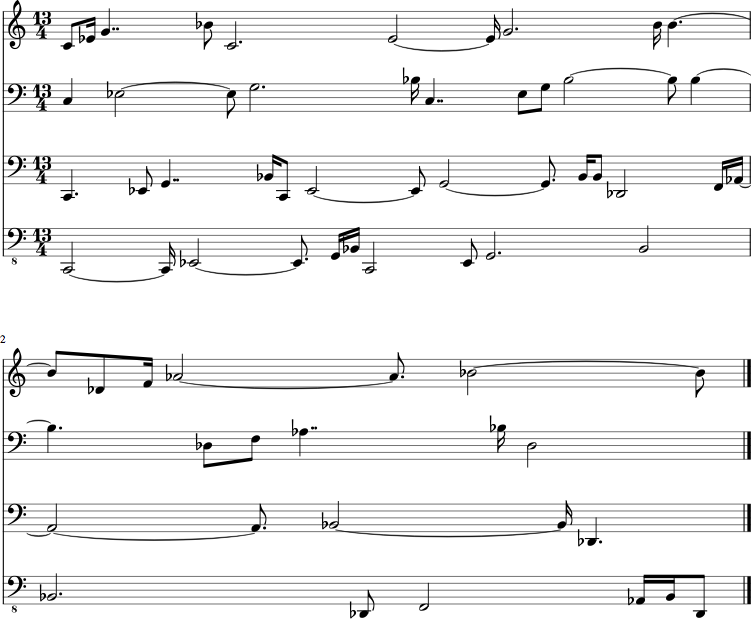

In [6]:
s.show()